In [26]:
!pip install transformers
!pip install pandas

In [27]:
from transformers import pipeline
import pandas as pd

In [28]:
classifier = pipeline("sentiment-analysis",model="soleimanian/roberta-large")

Device set to use cpu


In [29]:
from transformers import pipeline
import pandas as pd


classifier = pipeline("sentiment-analysis", model="soleimanian/roberta-large")

file_path = 'q4 transcript.txt'
sentences = []
current_text = ""
is_question = False

# this includes logic to merge "Q: ..." sentences to the answer sentence.
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        if line.startswith("Q:"):
            if current_text:
                sentences.append(current_text)
            current_text = line
            is_question = True
        elif line:
            if is_question or current_text:
                current_text += " " + line
            else:
                current_text = line
        else:
            if current_text:
                sentences.append(current_text)
                current_text = ""
                is_question = False

if current_text:
    sentences.append(current_text)

# sentiment analysis on each sentence
result_dict = {'sentence': [], 'label': [], 'certainty_score': [], 'sentiment_score': []}

for sentence in sentences:
    result = classifier(sentence)[0]
    certainty_score = result['score']

    if result['label'] == 'positive':
        sentiment_score = certainty_score
    elif result['label'] == 'negative':
        sentiment_score = -certainty_score
    else:
        sentiment_score = 0

    result_dict['sentence'].append(sentence)
    result_dict['label'].append(result['label'])
    result_dict['certainty_score'].append(certainty_score)
    result_dict['sentiment_score'].append(sentiment_score)

df = pd.DataFrame.from_dict(result_dict)
df

Device set to use cpu


,sentence,label,certainty_score,sentiment_score
0,"Good afternoon, everyone, and welcome to Tesla...",neutral,0.999607,0.000000
1,"During the Q&A portion, please limit yourself ...",neutral,0.999496,0.000000
2,Elon Musk:,neutral,0.998864,0.000000
3,"In Q4, we set a record, delivering vehicles at...",positive,0.998127,0.998127
4,We remain focused on maximizing volumes and ad...,positive,0.997996,0.997996
5,We laid the groundwork for this in 2024 and wi...,positive,0.997339,0.997339
6,A typical passenger car has about 10 hours of ...,positive,0.993754,0.993754
7,FSD Version 13 has shown significant improveme...,positive,0.998293,0.998293
8,"Optimus, our humanoid robot, will require at l...",neutral,0.996581,0.000000
9,"In June, we plan to launch unsupervised FSD as...",positive,0.998092,0.998092


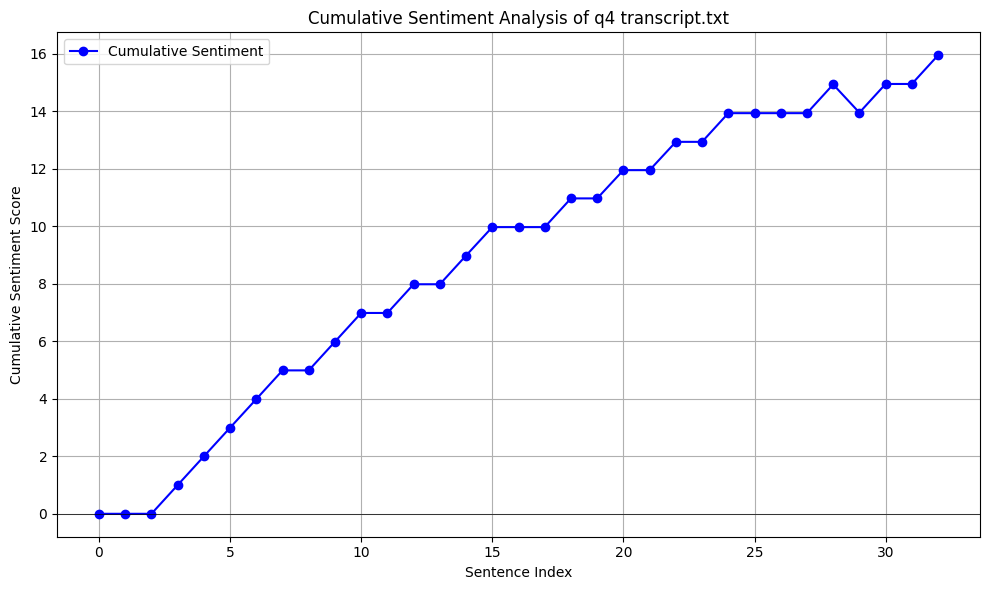

In [30]:
import matplotlib.pyplot as plt

# add score up
df['cumulative_sentiment'] = df['sentiment_score'].cumsum()

# visualization
plt.figure(figsize=(10, 6))

plt.plot(df.index, df['cumulative_sentiment'], marker='o', linestyle='-', color='b', label='Cumulative Sentiment')
plt.axhline(0, color='black', linewidth=0.5)

plt.xlabel('Sentence Index')
plt.ylabel('Cumulative Sentiment Score')
plt.title('Cumulative Sentiment Analysis of ' + file_path)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()